In [1]:
import pickle
import os
import time
import numpy as np
import ast


import cooltools
import cooltools.lib.plotting
#import functions

import shutil

import pandas as pd
import warnings
import h5py 
import glob

#from scorefunctions import *
import matplotlib.pyplot as plt
import sys
from scipy import ndimage

import matplotlib.ticker as tkr

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


In [6]:
file = pd.read_csv('../../../data/loop_size_converged_pair.csv')

In [3]:
lifetime = file['life']
velocity = file['vel']
clife = file['clife']
cof = file['cof']

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
#unique_sep = np.unique(sep)

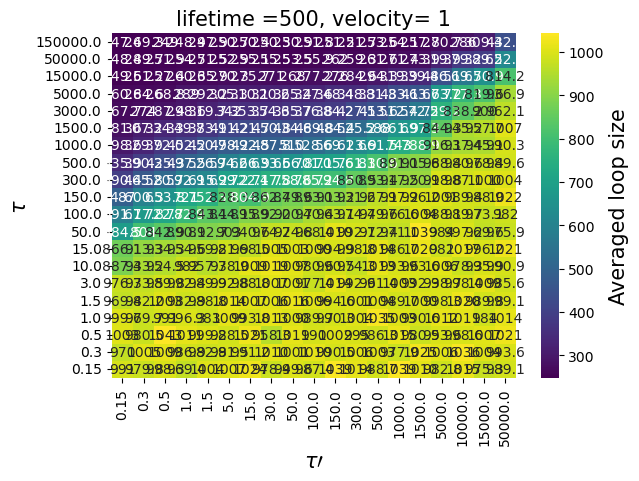

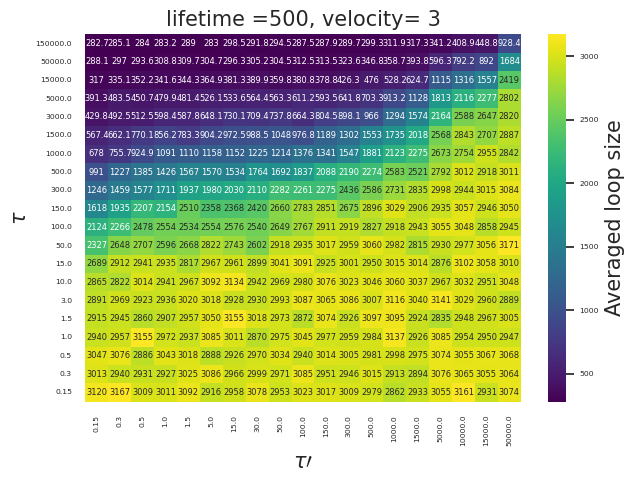

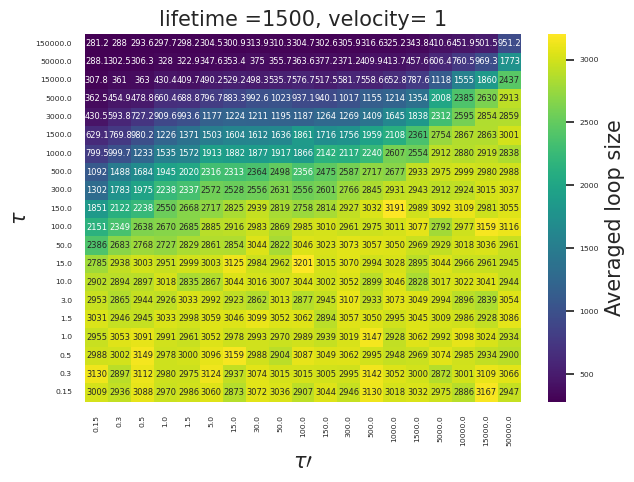

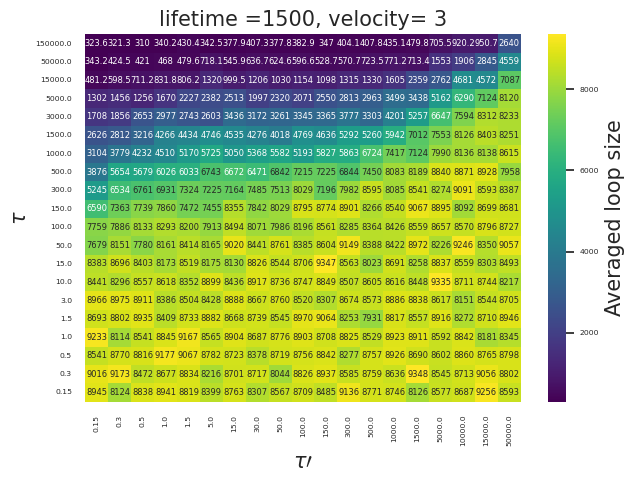

In [4]:
import seaborn as sns

unique_vel = [ 1,3]
unique_life = [ 500, 1500]
#unique_sep = [100]


c = 1

for life in list(unique_life):
    for vel in list(unique_vel):
        #plt.figure(figsize=(5, 5))
        #plt.subplot(1, 1, c)
        
        new_file = file[(lifetime == life) & (velocity == vel)][['clife', 'cof', 'loopmean']]
        #print(new_file)
        heatmap_data = new_file.pivot('clife', 'cof', 'loopmean')
        
        # Create the heatmap using seaborn
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis',  fmt='.4g', cbar_kws={'label': ' Average of loop size'})
        sns.set(font_scale=0.5)

        # Access the color bar object
        cbar = im.collections[0].colorbar
        
        # Set the font size of color bar label
        cbar.set_label('Averaged loop size', fontsize=15)  # Adjust the font size as needed
        
        # Customize labels and title
        plt.xlabel(r'$\tau\prime$', fontsize=15)
        plt.ylabel(r'$\tau$', fontsize=15)
        plt.title('lifetime =%s, velocity= %s' % (life, vel),fontsize =15)
        plt.gca().invert_yaxis()
        
        c += 1


        plt.tight_layout()
        #plt.savefig('averaged_loop_size_life_%s_vel_%s_sep_%s.png'%(life,vel,sep))
        plt.show()

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppt" which is no longer supported as of 3.3 and will become an error in 3.6


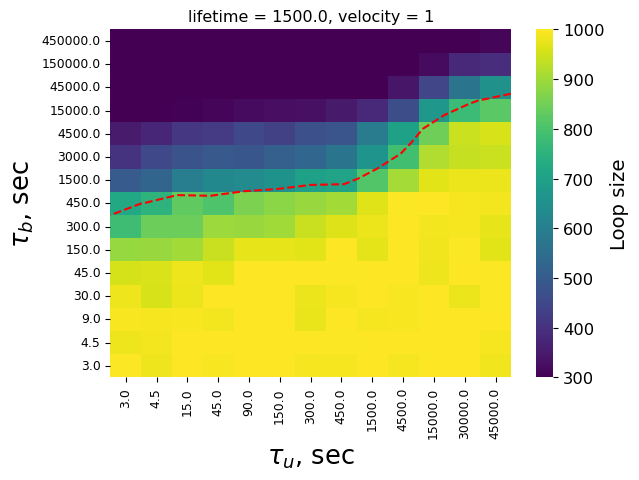

In [23]:
# Define unique values for lifetime and velocity
unique_life = [500]
unique_vel = [1]

c = 1
file = pd.read_csv('../../../data/loop_size_converged_pair.csv')
convertor = 3
tau_range = [1, 1.5, 3,5, 10, 15, 30, 50, 100, 150, 500, 1000, 1500,5000, 15000, 50000, 150000]
taup_range = [ 1.0, 1.5,  3,5.0, 10.0, 15,30,  50, 100, 150,500, 1500, 5000, 10000,15000]
file = file[file['clife'].isin(tau_range)]
file = file[file['cof'].isin(taup_range)]
convertor= 25*60/500
file['clife']=file['clife']*convertor
file['cof']=file['cof']*convertor
for life in unique_life:
    for vel in unique_vel:
        # Filter the data based on lifetime and velocity
        new_file = file[(file['life'] == life) & (file['vel'] == vel)][['clife', 'cof', 'loopmean']]
        
        # Pivot the filtered data to create the heatmap data
        heatmap_data = new_file.pivot('clife', 'cof', 'loopmean')

        fig, ax = plt.subplots()

        smooth_scale = 1
        z = ndimage.zoom(heatmap_data.to_numpy(), smooth_scale)
        
        # Create the heatmap using seaborn
        ax = sns.heatmap(heatmap_data, annot=False, vmin = 300, vmax= 1000,cmap='viridis', fmt='.4g', cbar_kws={'label': 'Loop size'})
        sns.set(font_scale=0.53)
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=11.75)
        # Set the font size of color bar label
        cbar.set_label('Loop size', fontsize=14.15)

        # Add equipotential lines for loop size = 700
        number_tau = 13
        number_taup =15
        cntr = ax.contour(np.linspace(0, number_tau, number_tau*smooth_scale),
                           np.linspace(0, number_taup, number_taup*smooth_scale),
                           heatmap_data.to_numpy(), levels=[750], colors='red', linestyles='dashed') 
        
        # Customize labels and title
        plt.xlabel(r'$\tau_u$, sec', fontsize=18.5)
        plt.ylabel(r'$\tau_b$, sec', fontsize=18.5)
        plt.xticks(fontsize=8.91)
        plt.yticks(fontsize=8.91)
        plt.title('lifetime = %s, velocity = %s' % (life*convertor, vel), fontsize=11.5)
        #fmtr = tkr.StrMethodFormatter('{x:.1f}')

        #plt.gca().xaxis.set_major_formatter(fmtr)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('loopsize_for_pair.pdf',ppt= 500,transparent=True)
        plt.show()


In [12]:
num_plot = 10
viridis_cmap = plt.get_cmap('cividis')

# Generate an array of values from 0 to 1 to map to colors in the colormap
values = np.linspace(0, 1, num_plot)

# Get the corresponding colors from the colormap
colors = viridis_cmap(values)

### data for static

In [14]:
import os
import pandas as pd

# Directory containing the CSV files
directory_stat = '../../../simulations/extruder_between_convergent_static/data/'

# Initialize an empty list to store data frames
dfs_stat = []

# Iterate through all files in the directory
for filename in os.listdir(directory_stat):
    if filename.endswith('.csv'):
        # Read the CSV file into a data frame
        filepath = os.path.join(directory_stat, filename)
        df = pd.read_csv(filepath)
        # Append the data frame to the list
        dfs_stat.append(df)

# Concatenate all data frames in the list vertically (along the rows)
merged_df_stat = pd.concat(dfs_stat, ignore_index=True)

# Now merged_df contains all data from CSV files in the directory
merged_df_stat

,life,vel,face,clife,cof,loopmean,loopstd
0,1500.0,1,0.40,10.0,1.5,592.225197,921.200236
1,1500.0,3,0.01,10.0,1.5,8627.413217,7861.774744
2,1500.0,3,0.50,10.0,1.5,2968.163337,4510.742675
3,500.0,3,0.05,10.0,1.5,2567.467045,2676.648940
4,500.0,1,0.70,10.0,1.5,278.322070,209.341413
5,500.0,3,0.60,10.0,1.5,849.295385,1358.379860
6,500.0,1,0.60,10.0,1.5,295.047110,251.644055
7,500.0,3,0.70,10.0,1.5,799.812651,1267.614857
8,500.0,1,0.01,10.0,1.5,953.420440,1045.253434
9,1500.0,1,0.50,10.0,1.5,487.987446,727.392186


In [15]:
file_stat = merged_df_stat

In [16]:
# Directory containing the CSV files
directory_stat = '../../../simulations/extruder_between_convergent_static-Copy1/data/'

# Initialize an empty list to store data frames
dfs_stat = []

# Iterate through all files in the directory
for filename in os.listdir(directory_stat):
    if filename.endswith('.csv'):
        # Read the CSV file into a data frame
        filepath = os.path.join(directory_stat, filename)
        df = pd.read_csv(filepath)
        # Append the data frame to the list
        dfs_stat.append(df)

# Concatenate all data frames in the list vertically (along the rows)
merged_df_stat = pd.concat(dfs_stat, ignore_index=True)

# Now merged_df contains all data from CSV files in the directory
merged_df_stat

,life,vel,face,clife,cof,loopmean,loopstd
0,50.0,1,0.20,1.0,0.15,845.664874,872.800362
1,50.0,1,0.90,1.0,0.15,325.510995,303.365105
2,50.0,1,0.05,1.0,0.15,965.394592,985.909717
3,50.0,3,0.80,1.0,0.15,1888.456592,2212.666844
4,50.0,3,0.30,1.0,0.15,2673.735200,2830.296759
5,150.0,1,0.01,1.0,0.15,2945.049844,2950.618764
6,150.0,3,0.20,1.0,0.15,8046.816165,7555.956820
7,150.0,3,0.90,1.0,0.15,4294.122850,5550.195725
8,150.0,1,0.80,1.0,0.15,818.493102,1267.207789
9,150.0,1,0.30,1.0,0.15,2153.124619,2420.221893


In [17]:
file_stat = merged_df_stat

In [18]:
def loop_size(t, v, delta, tau, x , taup):
    if v * t <= delta/2:
        return v * t * 2
    else:
        loop = delta + (taup / (tau + taup)) * v * (t - (delta/2 / v)) * 2
        if t > (x*tau+(delta/2)/(v)):
            loop += (tau / (tau + taup)) * v * (t - (delta/2 / v) - tau*x) * 2
        return loop

In [19]:
x_vals = np.linspace(0.01, 1, 10)
loop_sizes = np.array([loop_size(500, 1, 300, 5000, x, 50) for x in x_vals])
integral = np.trapz(loop_sizes, x_vals)
#loop_s.append([tau_val/(tau_val+taup_val), integral])
print(integral)
print(loop_size(500, 1, 300, 50000, 1, 50))

336.5346534653465
300.6993006993007


In [22]:
x_vals = np.linspace(0.01, 1, 10)
loop_sizes = np.array([loop_size(500, 1, 300, 5, x, 5000) for x in x_vals])
x_new_vals = np.linspace(1,10, 10)
integral = np.trapz(loop_sizes, x_vals)
new_int = np.trapz(loop_sizes, x_new_vals)

[999.9999001  999.9988012  999.9977023  999.9966034  999.9955045
 999.99440559 999.99330669 999.99220779 999.99110889 999.99000999] [0.01 0.12 0.23 0.34 0.45 0.56 0.67 0.78 0.89 1.  ]
989.9950054945056 8999.954595404595
999.999000999001


In [20]:
def loop_size_static(t, v, delta, occupancy):
    if v * t <= delta/2:
        return v * t * 2
    else:
        loop = delta + (1-occupancy) * v * (t - (delta/2 / v)) * 2
        return loop
sns.reset_defaults()

In [50]:
num_plot = 6
viridis_cmap = plt.get_cmap('cividis')

# Generate an array of values from 0 to 1 to map to colors in the colormap
values = np.linspace(0, 1, num_plot)

# Get the corresponding colors from the colormap
colors = viridis_cmap(values)

[0.15]


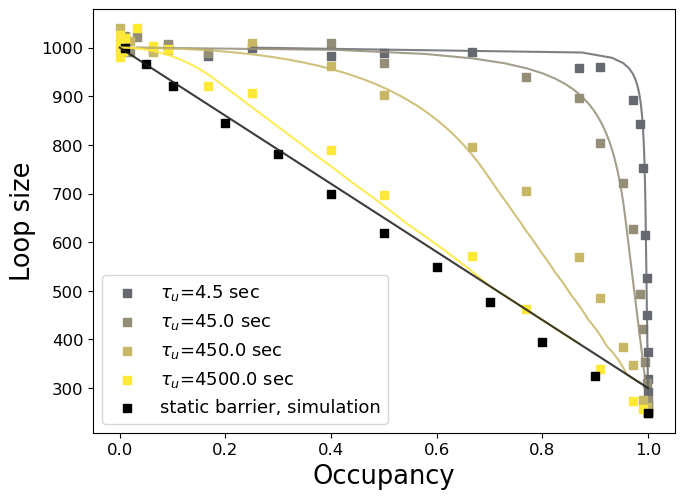

In [54]:
lifes, vels = [500] , [1]


i=1
file = pd.read_csv('../../../data/loop_size_converged_pair.csv')
sns.reset_defaults()
plt.figure(figsize=(7.5,5.5))
lifetime = file['life']
velocity = file['vel']
clife = file['clife']
cof = file['cof']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
cof_val = 10
list_cof = [1.5,15, 150, 1500]
y = [1000, 280]
for cof_val in list_cof:
    for life in lifes:
        for vel in vels:
            i+=1
            new_file = file[(lifetime == life)&(velocity == vel)&(cof==cof_val)][['clife','cof', 'loopmean','loopstd']]
            #new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered=new_file
            new_file_filtered = new_file_filtered.sort_values('clife')
            new_clife = new_file_filtered['clife']
            frip_score = new_file_filtered['loopmean']
            std = new_file_filtered['loopstd']
            plt.scatter(new_clife/(new_clife+cof_val), frip_score,  label = r'$\tau_u$=%s sec'%(cof_val*convertor),linewidth=1,s=31.5, marker = 's', color = colors[i])
            #plt.errorbar(new_clife/(new_clife+cof_val), frip_score, yerr= std, label = r'$\tau\prime$=%s'%cof_val,linewidth=1, color = colors[i])
            #plt.plot(new_clife/(new_clife+cof_val), frip_score, linewidth=1.5, color = colors[i],alpha = 1)

x = [0, 1]
file_5000 = file[(file['life']==500)&(file['vel']==1.0)&(file['cof']==5000)]
file_5000 = file_5000.sort_values('clife')
#print(file_5000)
y = [997.746284, 276.690274]
lifes, vels = [500] , [1]


i=1

lifetime = file_stat['life']
velocity = file_stat['vel']
clife = file_stat['clife']
cof = file_stat['cof']
face_prob = file_stat['face']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_faces = np.unique(face_prob)
faces = unique_faces
cof_val = 10
print(unique_cof)
x = [0, 1]
y = [1000, 280]
for life in lifes:
    for vel in vels:
        i+=1
        new_file = file_stat[(lifetime == 50)&(velocity == vel)&(cof==0.15)][['face', 'loopmean']]
        #new_file_filtered = new_file.drop_duplicates(keep = 'first')
        new_file_filtered=new_file
        new_file_filtered = new_file_filtered.sort_values('face')
        new_face = new_file_filtered['face']
        frip_score = new_file_filtered['loopmean']
        plt.scatter(new_face, frip_score, label = r'static barrier, simulation',linewidth=1,s=31.5, marker = 's',color = 'black')
        #plt.plot(new_face, frip_score, '--k',linewidth=1.5, alpha = 1)


loop_for_high = []  # Renamed list to avoid conflict with function name
lifetime_range = [500]
#taup_range = [1.5,15, 50, 150,500, 1500, 5000]
tau_range = np.arange(0.5,10000,10)
v_val_range = [1]
delta_val = 300
sep = 1000
i=1
for v_val in v_val_range:
    for taup_val in list_cof:
        for lifetime in lifetime_range:
            i+=1
            loop_s = []
            for tau_val in tau_range:
                x_vals = np.linspace(0.1, 1, 10)
                loop_sizes = np.array([loop_size(lifetime, v_val, delta_val, tau_val, x, taup_val) for x in x_vals])
                integral = np.trapz(loop_sizes, x_vals)
                integral = np.mean(loop_sizes)
                loop_s.append([tau_val/(tau_val+taup_val), integral])
            loop_s = np.array(loop_s)
            plt.plot(loop_s[:,0],loop_s[:,1],  alpha = 0.85, color= colors[i])#label=r'$\tau\prime$=%s'%(taup_val),

occupancy_range = np.arange(0,1.05,0.05)
lifetime_val = 500
loop_stat=[]
for occupancy_val in occupancy_range:
    loop_s = loop_size_static(lifetime_val,v=v_val,delta=delta_val,occupancy=occupancy_val)
    loop_stat.append([occupancy_val,loop_s])
loop_stat = np.array(loop_stat)
plt.plot(loop_stat[:,0],loop_stat[:,1],'-k',alpha = 0.85)#,label='static barrier')
#plt.title('Analytical approximation')
#plt.title(r'$\delta_{barrier}$ = 300 ')
plt.ylabel('Loop size', fontsize = 18.5)
plt.xlabel(r'Occupancy', fontsize = 18.5)
plt.xticks(fontsize = 11.95)
plt.yticks(fontsize =11.95)
#plt.legend(loc=(1,0.15))
plt.legend(fontsize=12.95)
plt.savefig('analytical_for_loop_size.pdf',transparent =True)
plt.show()  


[0.15]


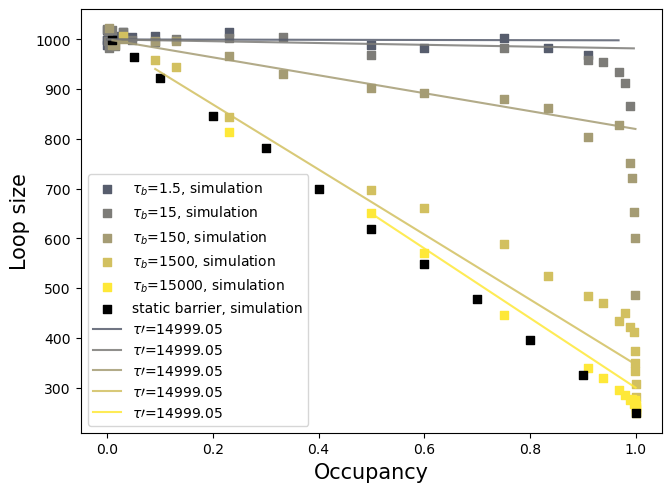

In [57]:
lifes, vels = [500] , [1]


i=1
num_plot = 7
viridis_cmap = plt.get_cmap('cividis')

# Generate an array of values from 0 to 1 to map to colors in the colormap
values = np.linspace(0, 1, num_plot)

# Get the corresponding colors from the colormap
colors = viridis_cmap(values)

plt.figure(figsize=(7.5,5.5))
lifetime = file['life']
velocity = file['vel']
clife = file['clife']
cof = file['cof']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
cof_val = 10
list_cof = [1.5,15, 150, 1500]
list_clife = [1.5,15,150, 1500, 15000]
y = [1000, 280]
for clife_val in list_clife:
    for life in lifes:
        for vel in vels:
            i+=1
            new_file = file[(lifetime == life)&(velocity == vel)&(clife==clife_val)][['clife','cof', 'loopmean','loopstd']]
            #new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered=new_file
            new_file_filtered = new_file_filtered.sort_values('cof')
            new_cof = new_file_filtered['cof']
            frip_score = new_file_filtered['loopmean']
            std = new_file_filtered['loopstd']
            plt.scatter(clife_val/(clife_val+new_cof), frip_score,  label = r'$\tau_b$=%s, simulation'%clife_val,linewidth=1,s=31.5, marker = 's', color = colors[i])
            #plt.errorbar(new_clife/(new_clife+cof_val), frip_score, yerr= std, label = r'$\tau\prime$=%s'%cof_val,linewidth=1, color = colors[i])
            #plt.plot(new_clife/(new_clife+cof_val), frip_score, linewidth=1.5, color = colors[i],alpha = 1)

x = [0, 1]
file_5000 = file[(file['life']==500)&(file['vel']==1.0)&(file['cof']==5000)]
file_5000 = file_5000.sort_values('clife')
#print(file_5000)
y = [997.746284, 276.690274]
lifes, vels = [500] , [1]
i=1

lifetime = file_stat['life']
velocity = file_stat['vel']
clife = file_stat['clife']
cof = file_stat['cof']
face_prob = file_stat['face']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_faces = np.unique(face_prob)
faces = unique_faces
cof_val = 10
print(unique_cof)
x = [0, 1]
y = [1000, 280]
for life in lifes:
    for vel in vels:
        i+=1
        new_file = file_stat[(lifetime == 50)&(velocity == vel)&(cof==0.15)][['face', 'loopmean']]
        #new_file_filtered = new_file.drop_duplicates(keep = 'first')
        new_file_filtered=new_file
        new_file_filtered = new_file_filtered.sort_values('face')
        new_face = new_file_filtered['face']
        frip_score = new_file_filtered['loopmean']
        plt.scatter(new_face, frip_score, label = r'static barrier, simulation',linewidth=1,s=31.5, marker = 's',color = 'black')
        #plt.plot(new_face, frip_score, '--k',linewidth=1.5, alpha = 1)


loop_for_high = []  # Renamed list to avoid conflict with function name
lifetime_range = [500]
#taup_range = [1.5,15, 50, 150,500, 1500, 5000]
taup_range = np.arange(0.05,15000,1)
v_val_range = [1]
delta_val = 300
sep = 1000
i=1
for v_val in v_val_range:
    for tau_val in list_clife:
        for lifetime in lifetime_range:
            i+=1
            loop_s = []
            for taup_val in taup_range:
                x_vals = np.linspace(0.1, 1.1, 10)
                loop_sizes = np.array([loop_size(lifetime, v_val, delta_val, tau_val, x, taup_val) for x in x_vals])
                integral = np.trapz(loop_sizes, x_vals)
                integral = np.mean(loop_sizes)
                loop_s.append([tau_val/(tau_val+taup_val), integral])
            loop_s = np.array(loop_s)
            plt.plot(loop_s[:,0],loop_s[:,1],label=r'$\tau\prime$=%s'%(taup_val),  alpha = 0.85, color= colors[i])

occupancy_range = np.arange(0,1.05,0.05)
lifetime_val = 500
loop_stat=[]
for occupancy_val in occupancy_range:
    loop_s = loop_size_static(lifetime_val,v=v_val,delta=delta_val,occupancy=occupancy_val)
    loop_stat.append([occupancy_val,loop_s])
loop_stat = np.array(loop_stat)
#plt.plot(loop_stat[:,0],loop_stat[:,1],'-k',alpha = 0.85,label='static barrier')
#plt.title('Analytical approximation')
#plt.title(r'$\delta_{barrier}$ = 300 ')
plt.ylabel('Loop size', fontsize = 15)
plt.xlabel(r'Occupancy', fontsize = 15)
#plt.legend(loc=(1,0.15))
plt.legend()
plt.savefig('analytical_for_loop_size.png')
plt.show()  



In [58]:
def loop_size(t, v, delta, tau, x , taup):
    if v * t <= delta/2:
        return v * t * 2
    else:
        loop = delta + (taup / (tau + taup)) * v * (t - (delta/2 / v)) * 2
        if t > (x*tau+(delta/2)/(v)):
            loop += (tau / (tau + taup))* v * (t - (delta/2 / v) - tau*x) * 2
        return loop
s=loop_size(500, 1, 300, 150, 1, 0.0015) 
#print(s)
s=loop_size(500, 1, 300, 15000, 0.1, 0.000015) 


In [5]:



filename = 'folder_face_1.0_back_0_Clife_1.5_Cof_0.15_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_300_site_10_monomer_1000_replica_10_steps_20.0_vel_1'

params = [ast.literal_eval(i) for i in filename.split('folder_')[1].split('_')[1::2]]
face, back, clife, cof, life, slife, birth, pause, sep, site, monomer, replica, steps, vel = params

In [10]:
paramdict_CTCF={
            'CTCF_facestall':[1, 1],
            'CTCF_backstall':[0, 0],
            'CTCF_lifetime':[clife, clife],
            'CTCF_offtime':[cof, cof],
            'LEF_lifetime':[life, life],
            'LEF_stalled_lifetime':[slife, slife],
            'LEF_birth':[0, 0.1],
            'LEF_pause':[0.9, 0.9],
            'LEF_separation':3000,
            'sites_per_monomer':10,
            'monomers_per_replica':3000,
            'number_of_replica':1,
            'steps':200,
            'velocity_multiplier':vel
            }

In [11]:
monomers_per_replica = paramdict_CTCF['monomers_per_replica']
sites_per_monomer = paramdict_CTCF['sites_per_monomer']
sites_per_replica = monomers_per_replica*sites_per_monomer
monomer_types = np.zeros(monomers_per_replica, dtype=int)
site_types = np.repeat(monomer_types, sites_per_monomer)
#print(len(site_types))

# Let's make some strong and weak CTCF regions
typedict = {'strong_CTCF':1, 'weak_CTCF':0}
site_types[15000:15300] = typedict['strong_CTCF']
site_types[:15000] = site_types[15300:] = typedict['weak_CTCF']


# LEF/CTCF properties in type A monomers may be obtained from the paramdict as follows
LEF_lifetime = paramdict_CTCF['LEF_lifetime'][1]
LEF_velocity = paramdict_CTCF['velocity_multiplier']
CTCF_facestall = paramdict_CTCF['CTCF_facestall']
CTCF_offtime = paramdict_CTCF['CTCF_offtime']
#print(CTCF_offtime[typedict['strong_CTCF']], CTCF_offtime[typedict['weak_CTCF']])

# Create some CTCF boundary sites
CTCF_left_positions = np.array([15000])
CTCF_right_positions = np.array([15300])


### derivative analysis of theoretical loop size

In [59]:
def loop_size(t, v, delta, tau, x , taup):
    if v * t <= delta/2:
        return v * t * 2
    else:
        loop = delta + (taup / (tau + taup)) * v * (t - (delta/2 / v)) * 2
        if t > (x*tau+(delta/2)/(v)):
            loop += (tau / (tau + taup)) * v * (t - (delta/2 / v) - tau*x) * 2
        return loop

In [60]:
x_vals = np.linspace(0.01, 1, 10)
loop_sizes = np.array([loop_size(500, 1, 300, 5000, x, 50) for x in x_vals])
integral = np.trapz(loop_sizes, x_vals)


In [61]:
x_vals = np.linspace(0.01, 1, 10)
loop_sizes = np.array([loop_size(500, 1, 300, 5, x, 5000) for x in x_vals])
#print(loop_sizes, x_vals)
x_new_vals = np.linspace(1,10, 10)
integral = np.trapz(loop_sizes, x_vals)
new_int = np.trapz(loop_sizes, x_new_vals)

In [62]:
from polychrom.polymer_analyses import slope_contact_scaling
from scipy.ndimage import gaussian_filter1d

def smooth(x, sigma = 1.75):
        return gaussian_filter1d(x, sigma)

In [63]:
def loop_size(t, v, delta, tau, x , taup):
    if v * t <= delta/2:
        return v * t * 2
    else:
        loop = delta + (taup / (tau + taup)) * v * (t - (delta/2 / v)) * 2
        if t > (x*tau+(delta/2)/(v)):
            loop += (tau / (tau + taup)) * v * (t - (delta/2 / v) - tau*x) * 2
        return loop

In [64]:
def dloop_size(t, v, delta, tau, x , taup):
    if v * t <= delta/2:
        return 0
    else:
        dloop =  (-taup / ((tau + taup)**2)) * v * (t - (delta/2 / v)) * 2
        if t > (x*tau+(delta/2)/(v)):
            loop += (tau / (tau + taup)) * v * (t - (delta/2 / v) - tau*x) * 2
        return loop

In [65]:
num_plot = 15
viridis_cmap = plt.get_cmap('cividis')

# Generate an array of values from 0 to 1 to map to colors in the colormap
values = np.linspace(0, 1, num_plot)

# Get the corresponding colors from the colormap
colors = viridis_cmap(values)

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  


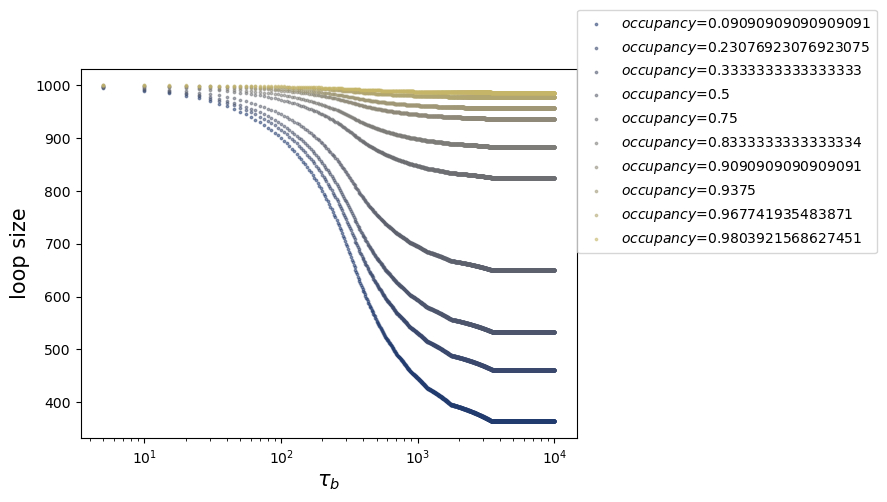

In [66]:
loop_for_high = []  # Renamed list to avoid conflict with function name
lifetime_range = [500]
taup_range = [1.5,15, 50, 150,500, 1500, 5000]
tau_range = np.arange(0,10000,5)
multip_range = [0.1, 0.3, 0.5, 1, 3, 5, 10, 15, 30, 50]
v_val_range = [1]
delta_val = 300
sep = 1000
i=1
def loop_size(t, v, delta, tau, x , taup):
    if v * t <= delta/2:
        return v * t * 2
    else:
        loop = delta + (taup / (tau + taup)) * v * (t - (delta/2 / v)) * 2
        if t > (x*tau+(delta/2)/(v)):
            loop += (tau / (tau + taup)) * v * (t - (delta/2 / v) - tau*x) * 2
        return loop
for v_val in v_val_range:
    for multip in multip_range:
        for lifetime in lifetime_range:
            i+=1
            loop_s = []
            for tau_val in tau_range:
                x_vals = np.linspace(0.1, 1, 10)
                taup_val = tau_val*multip
                loop_sizes = np.array([loop_size(lifetime, v_val, delta_val, tau_val, x, taup_val) for x in x_vals])
                integral = np.trapz(loop_sizes, x_vals)
                integral = np.mean(loop_sizes)
                loop_s.append([tau_val, integral])
            loop_s = np.array(loop_s)
            plt.scatter(loop_s[:,0],loop_s[:,1],label=r'$occupancy$=%s'%(multip/(1+multip)), s=3, alpha = 0.5, color= colors[i])


plt.ylabel('loop size', fontsize = 15)
plt.xlabel(r'$\tau_b$', fontsize = 15)
plt.xscale('log')
plt.legend(loc=(1,0.5))
plt.show()  


/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  
/home1/rahmanin/start/polychrom/polychrom/polychrom/polymer_analyses.py:207: RuntimeWarning: divide by zero encountered in log
  slope = np.diff(smooth(np.log(cp))) / np.diff(smooth(np.log(mids)))
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/numpy/lib/function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  


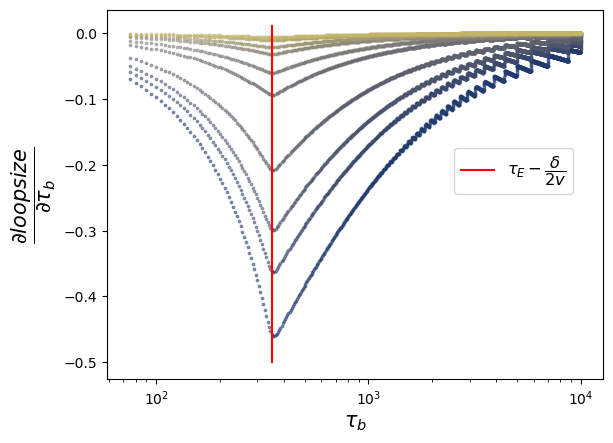

In [67]:
loop_for_high = []  # Renamed list to avoid conflict with function name
lifetime_range = [500]
taup_range = [1.5,15, 50, 150,500, 1500, 5000]
tau_range = np.arange(0,10000,5)
multip_range = [0.1, 0.3, 0.5, 1, 3, 5, 10, 15, 30, 50]
v_val_range = [1]
delta_val = 300
sep = 1000
i=1
def loop_size(t, v, delta, tau, x , taup):
    if v * t <= delta/2:
        return v * t * 2
    else:
        loop = delta + (taup / (tau + taup)) * v * (t - (delta/2 / v)) * 2
        if t > (x*tau+(delta/2)/(v)):
            loop += (tau / (tau + taup)) * v * (t - (delta/2 / v) - tau*x) * 2
        return loop
for v_val in v_val_range:
    for multip in multip_range:
        for lifetime in lifetime_range:
            i+=1
            loop_s = []
            for tau_val in tau_range:
                x_vals = np.linspace(0.01, 1, 100)
                taup_val = tau_val*multip
                loop_sizes = np.array([loop_size(lifetime, v_val, delta_val, tau_val, x, taup_val) for x in x_vals])
                integral = np.trapz(loop_sizes, x_vals)
                integral = np.mean(loop_sizes)
                loop_s.append([tau_val, integral])
            loop_s = np.array(loop_s)
            s, der = slope_contact_scaling(loop_s[:,0], smooth(loop_s[:,1]), sigma=1.5)
            #plt.scatter(loop_s[:,0],loop_s[:,1],label=r'$occupancy$=%s'%(multip/(1+multip)), s=3, alpha = 0.5, color= colors[i])
            plt.scatter(s,der, s =3, alpha=0.5, color=colors[i])
plt.plot([lifetime-delta_val/(2*v_val), lifetime-delta_val/(2*v_val)],[-0.5, 0.01],color='red', label = r'$\tau_E-\dfrac{\delta}{2v}$')

plt.ylabel(r'$\dfrac{\partial loop size}{\partial \tau_b}$', fontsize = 15)
plt.xlabel(r'$\tau_b$', fontsize = 15)
plt.xscale('log')
plt.legend(loc=(0.7,0.5),fontsize = 11.75)
plt.show()  


/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  


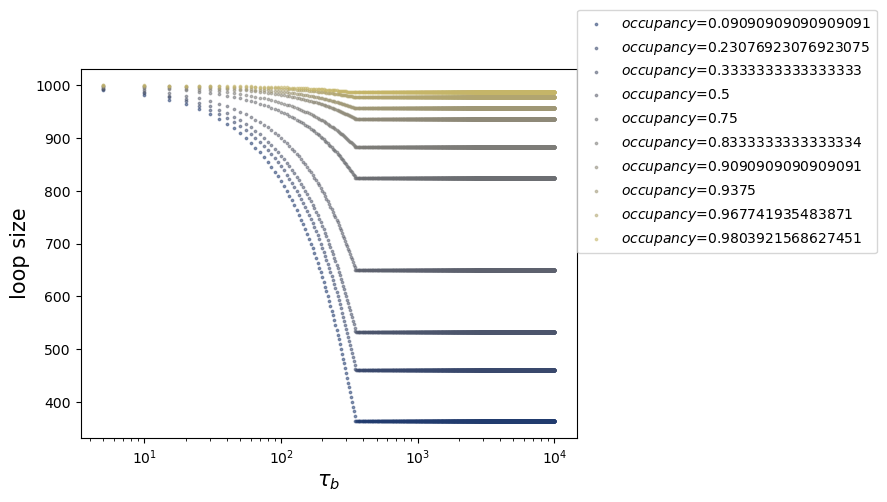

In [69]:
loop_for_high = []  # Renamed list to avoid conflict with function name
lifetime_range = [500]
taup_range = [1.5,15, 50, 150,500, 1500, 5000]
tau_range = np.arange(0,10000,5)
multip_range = [0.1, 0.3, 0.5, 1, 3, 5, 10, 15, 30, 50]
v_val_range = [1]
delta_val = 300
sep = 1000
i=1
def loop_size(t, v, delta, tau, x , taup):
    if v * t <= delta/2:
        return v * t * 2
    else:
        loop = delta + (taup / (tau + taup)) * v * (t - (delta/2 / v)) * 2
        if t > (x*tau+(delta/2)/(v)):
            loop += (tau / (tau + taup)) * v * (t - (delta/2 / v) - tau*x) * 2
        return loop
for v_val in v_val_range:
    for multip in multip_range:
        for lifetime in lifetime_range:
            i+=1
            loop_s = []
            for tau_val in tau_range:
                x_vals = np.linspace(0.9991, 1, 1)
                taup_val = tau_val*multip
                loop_sizes = np.array([loop_size(lifetime, v_val, delta_val, tau_val, x, taup_val) for x in x_vals])
                integral = np.trapz(loop_sizes, x_vals)
                integral = np.mean(loop_sizes)
                loop_s.append([tau_val, integral])
            loop_s = np.array(loop_s)
            plt.scatter(loop_s[:,0],loop_s[:,1],label=r'$occupancy$=%s'%(multip/(1+multip)), s=3, alpha = 0.5, color= colors[i])


plt.ylabel('loop size', fontsize = 15)
plt.xlabel(r'$\tau_b$', fontsize = 15)
plt.xscale('log')
plt.legend(loc=(1,0.5))
plt.show()  
